In [36]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

plt.rcParams["font.size"] = 16

from sklearn.compose import (
    ColumnTransformer,
    TransformedTargetRegressor,
    make_column_transformer,
)
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, train_test_split 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,KBinsDiscretizer
from lightgbm.sklearn import LGBMRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
# import shap
import joblib

In [3]:
df = pd.read_csv("data/data.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [6]:
print(df.shape)
df.isnull().sum()

(20758, 22)


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

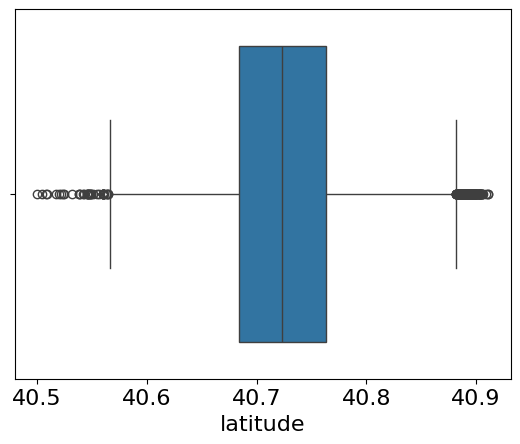

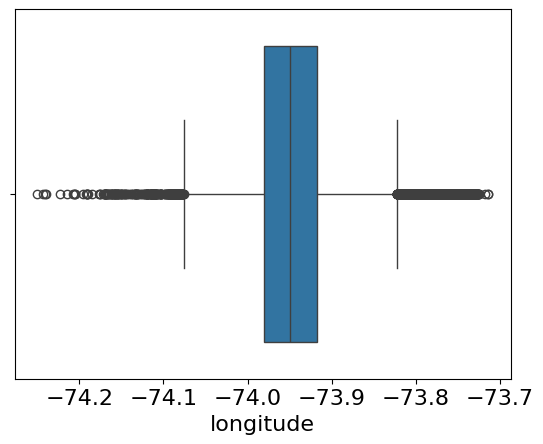

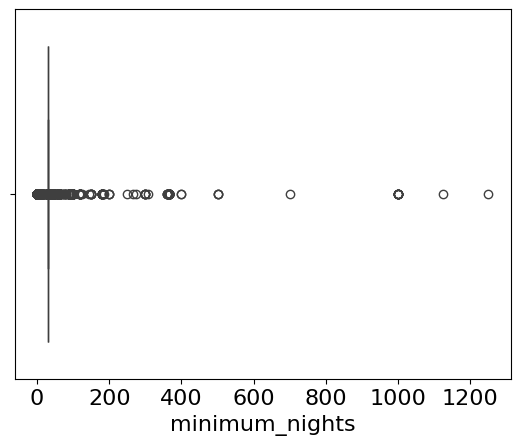

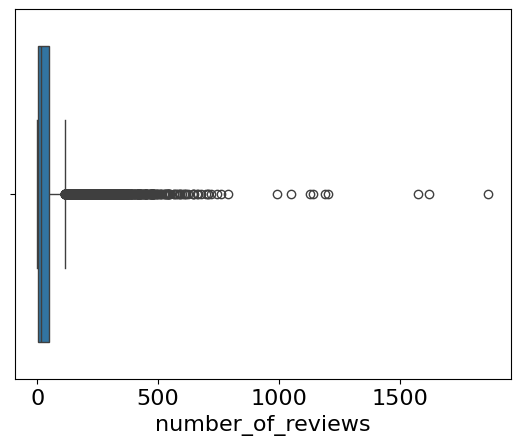

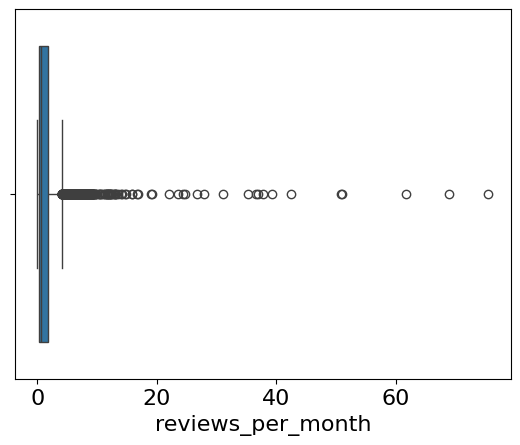

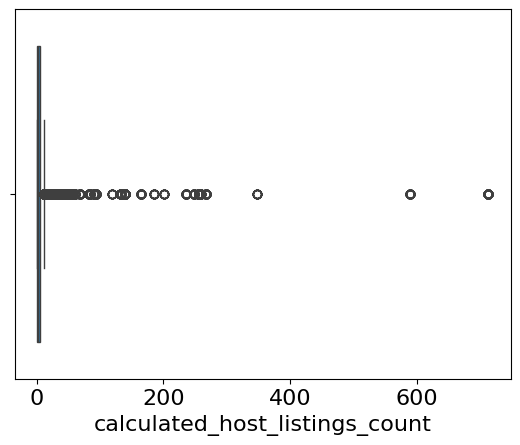

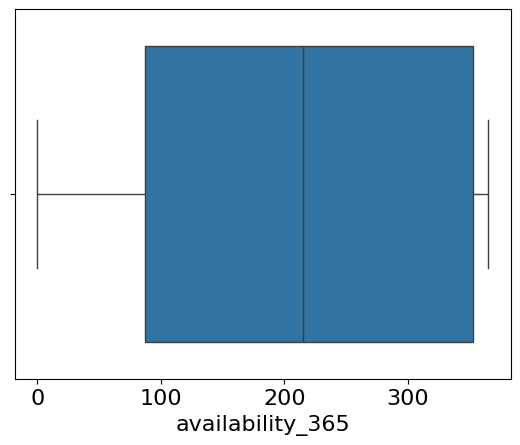

In [8]:
numerical_columns = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
for i in numerical_columns:
    plot = sns.boxplot(x=df[i])
    plt.show()

In [9]:
train_df,test_df= train_test_split(df,test_size = 0.3)

X_train = train_df.drop(columns=['price'])
y_train = train_df['price']

X_test = test_df.drop(columns=['price'])
y_test = test_df['price']

We will be dropping id, host_name,latitude, longitude, reviews_per_month, number_of_reviews_ltm, license. 

In [10]:
print(df['room_type'].value_counts())

room_type
Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: count, dtype: int64


In [11]:
numerical_feats = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
categorical_feats = ['neighbourhood_group', 'room_type', "neighbourhood"]
drop_feats = ["id", "host_name","latitude", "longitude", "reviews_per_month", "number_of_reviews_ltm", "license"]

In [12]:
preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output = False, handle_unknown="ignore"), categorical_feats),
    (StandardScaler(), numerical_feats),
    ("drop", drop_feats)
)

In [13]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [14]:
results = {}
base_pipe = make_pipeline(preprocessor, DummyRegressor(strategy = "mean"))

In [15]:
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False) # since we are scoring using MAPE.

In [16]:
score_dummy = cross_validate(base_pipe, X_train, y_train, cv = 5,return_train_score=True,scoring=mape_scorer)
results["Dummy"] = mean_std_cross_val_scores( base_pipe, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(score_dummy))
pd. DataFrame(results).T


/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_43506/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,0.100022,0.034796,-0.952883,-0.991581
1,0.070133,0.112428,-1.068642,-1.068242
2,0.276281,0.100963,-1.080370,-1.067998
3,0.092017,0.026910,-1.013871,-1.003848
4,0.052114,0.027601,-1.088909,-1.070454


,fit_time,score_time,test_score,train_score
Dummy,0.087 (+/- 0.048),0.048 (+/- 0.047),-1.041 (+/- 0.057),-1.040 (+/- 0.039)


In [17]:
#Linear
param_grid = {'transformedtargetregressor__regressor__alpha': 10.0 ** np.arange(-5, 5, 1)}
ttr_R = TransformedTargetRegressor(
    Ridge(random_state=123), func=np.log1p, inverse_func=np.expm1
    )
pipe_linear = make_pipeline(preprocessor, ttr_R)
search = RandomizedSearchCV(pipe_linear, param_grid,n_iter=10, n_jobs=-1,return_train_score=True, scoring = mape_scorer)
search.fit(X_train, y_train)
train_scores = search.cv_results_["mean_train_score"]
cv_scores = search.cv_results_["mean_test_score"]
print("Train scores are:", train_scores)
print("Cross Validation scores are:", cv_scores)


Train scores are: [-0.44748331 -0.44748334 -0.44748368 -0.44748743 -0.44752419 -0.44775741
 -0.44911864 -0.45721628 -0.47524103 -0.5344213 ]
Cross Validation scores are: [-0.45713021 -0.45713    -0.45712805 -0.457109   -0.45693803 -0.45595872
 -0.45469828 -0.45975477 -0.47600481 -0.53472562]


Text(0, 0.5, 'score')

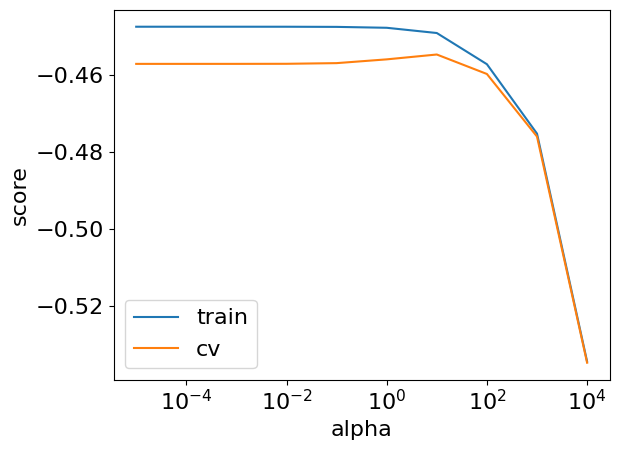

In [18]:
plt.semilogx(param_grid["transformedtargetregressor__regressor__alpha"], train_scores.tolist(), label="train")
plt.semilogx(param_grid["transformedtargetregressor__regressor__alpha"], cv_scores.tolist(), label="cv")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("score")

In [19]:
best_alpha = search.best_params_
print(best_alpha)
print("the best score in the linear model for that alpha is : ", search.best_score_)

{'transformedtargetregressor__regressor__alpha': 10.0}
the best score in the linear model for that alpha is :  -0.4546982782891037


In [20]:
ttr_R = TransformedTargetRegressor(
    Ridge(alpha = 1 , random_state=123), func=np.log1p, inverse_func=np.expm1
    )
pipe_linear = make_pipeline(preprocessor, ttr_R)
scores = cross_validate(pipe_linear, X_train, y_train, return_train_score=True, scoring=mape_scorer)
results["LinearModel"] = mean_std_cross_val_scores( pipe_linear, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(scores))
pd.DataFrame(results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_43506/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,0.114800,0.016338,-0.451176,-0.448325
1,0.092169,0.022804,-0.455060,-0.446179
2,0.091357,0.018295,-0.457953,-0.448776
3,0.126589,0.036171,-0.458716,-0.446862
4,0.087663,0.029315,-0.456889,-0.448644


,fit_time,score_time,test_score,train_score
Dummy,0.087 (+/- 0.048),0.048 (+/- 0.047),-1.041 (+/- 0.057),-1.040 (+/- 0.039)
LinearModel,0.152 (+/- 0.031),0.041 (+/- 0.037),-0.456 (+/- 0.003),-0.448 (+/- 0.001)


In [21]:
#Decision Tree
ttr_DTR = TransformedTargetRegressor(
    DecisionTreeRegressor(random_state=123), func=np.log1p, inverse_func=np.expm1
)
pipe2 = make_pipeline(preprocessor, ttr_DTR)
scores = cross_validate(pipe2, X_train, y_train, return_train_score=True, scoring=mape_scorer)
results["DecisionTreeRegressor"] = mean_std_cross_val_scores( pipe2, X_train, y_train, return_train_score=True, scoring=mape_scorer)
display(pd.DataFrame(scores))


/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_43506/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
0,0.481235,0.023561,-0.621152,-0.009345
1,0.311065,0.016689,-1.201807,-0.009823
2,0.296666,0.014716,-1.253411,-0.009585
3,0.329793,0.019491,-0.952313,-0.009625
4,0.344481,0.012900,-1.565941,-0.010238


In [22]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.087 (+/- 0.048),0.048 (+/- 0.047),-1.041 (+/- 0.057),-1.040 (+/- 0.039)
LinearModel,0.152 (+/- 0.031),0.041 (+/- 0.037),-0.456 (+/- 0.003),-0.448 (+/- 0.001)
DecisionTreeRegressor,0.325 (+/- 0.040),0.017 (+/- 0.002),-1.119 (+/- 0.354),-0.010 (+/- 0.000)


In [23]:
ttr_RFR = TransformedTargetRegressor(
    RandomForestRegressor(n_jobs=-1,random_state=123), func=np.log1p, inverse_func=np.expm1
)
pipe_rf = make_pipeline(
    preprocessor,ttr_RFR
)

results["Random forests"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T


/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_43506/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.087 (+/- 0.048),0.048 (+/- 0.047),-1.041 (+/- 0.057),-1.040 (+/- 0.039)
LinearModel,0.152 (+/- 0.031),0.041 (+/- 0.037),-0.456 (+/- 0.003),-0.448 (+/- 0.001)
DecisionTreeRegressor,0.325 (+/- 0.040),0.017 (+/- 0.002),-1.119 (+/- 0.354),-0.010 (+/- 0.000)
Random forests,14.877 (+/- 1.413),0.208 (+/- 0.184),-0.415 (+/- 0.023),-0.145 (+/- 0.001)


In [24]:
ttr_LGBM = TransformedTargetRegressor(
    LGBMRegressor(random_state=123, verbose=-1), func=np.log1p, inverse_func=np.expm1
)
pipe_lgbm = make_pipeline(
    preprocessor, ttr_LGBM
)


results["LGBM Regressor"] = mean_std_cross_val_scores(
    pipe_lgbm, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_43506/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.087 (+/- 0.048),0.048 (+/- 0.047),-1.041 (+/- 0.057),-1.040 (+/- 0.039)
LinearModel,0.152 (+/- 0.031),0.041 (+/- 0.037),-0.456 (+/- 0.003),-0.448 (+/- 0.001)
DecisionTreeRegressor,0.325 (+/- 0.040),0.017 (+/- 0.002),-1.119 (+/- 0.354),-0.010 (+/- 0.000)
Random forests,14.877 (+/- 1.413),0.208 (+/- 0.184),-0.415 (+/- 0.023),-0.145 (+/- 0.001)
LGBM Regressor,0.684 (+/- 0.579),0.056 (+/- 0.002),-0.395 (+/- 0.007),-0.361 (+/- 0.001)


In [25]:
class MyTransformedTargetRegressor(TransformedTargetRegressor):
    @property
    def feature_importances_(self):
        return self.regressor_.feature_importances_

    @property
    def coef_(self):
        return self.regressor_.coef_

In [26]:
Myttr_R = MyTransformedTargetRegressor(
    Ridge(random_state=123), func=np.log1p, inverse_func=np.expm1
)

rfe_cv = RFECV(Myttr_R, cv=10)

pipe_rfecv = make_pipeline(
    preprocessor,rfe_cv,LGBMRegressor(random_state=123, verbose=-1)
)

results["LGBM with RFECV"] = mean_std_cross_val_scores(
    pipe_rfecv, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_43506/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.087 (+/- 0.048),0.048 (+/- 0.047),-1.041 (+/- 0.057),-1.040 (+/- 0.039)
LinearModel,0.152 (+/- 0.031),0.041 (+/- 0.037),-0.456 (+/- 0.003),-0.448 (+/- 0.001)
DecisionTreeRegressor,0.325 (+/- 0.040),0.017 (+/- 0.002),-1.119 (+/- 0.354),-0.010 (+/- 0.000)
Random forests,14.877 (+/- 1.413),0.208 (+/- 0.184),-0.415 (+/- 0.023),-0.145 (+/- 0.001)
LGBM Regressor,0.684 (+/- 0.579),0.056 (+/- 0.002),-0.395 (+/- 0.007),-0.361 (+/- 0.001)
LGBM with RFECV,66.147 (+/- 6.056),0.042 (+/- 0.006),-0.981 (+/- 0.235),-0.810 (+/- 0.106)


In [27]:
select_CV = SelectFromModel(
    Myttr_R, threshold="median"
)

pipe_select_CV = make_pipeline(
    preprocessor,select_CV,LGBMRegressor(random_state=123, verbose=-1)
)

results["LGBM with SelectFromModel"] = mean_std_cross_val_scores(
    pipe_select_CV, X_train, y_train, return_train_score=True, scoring=mape_scorer
)

pd.DataFrame(results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_43506/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.087 (+/- 0.048),0.048 (+/- 0.047),-1.041 (+/- 0.057),-1.040 (+/- 0.039)
LinearModel,0.152 (+/- 0.031),0.041 (+/- 0.037),-0.456 (+/- 0.003),-0.448 (+/- 0.001)
DecisionTreeRegressor,0.325 (+/- 0.040),0.017 (+/- 0.002),-1.119 (+/- 0.354),-0.010 (+/- 0.000)
Random forests,14.877 (+/- 1.413),0.208 (+/- 0.184),-0.415 (+/- 0.023),-0.145 (+/- 0.001)
LGBM Regressor,0.684 (+/- 0.579),0.056 (+/- 0.002),-0.395 (+/- 0.007),-0.361 (+/- 0.001)
LGBM with RFECV,66.147 (+/- 6.056),0.042 (+/- 0.006),-0.981 (+/- 0.235),-0.810 (+/- 0.106)
LGBM with SelectFromModel,0.312 (+/- 0.167),0.053 (+/- 0.008),-0.842 (+/- 0.094),-0.830 (+/- 0.070)


Based on the results above The ```LGBMRegressor``` is the best performing model on this dataset.

# Hyperparameter Optimization

In [28]:
#Making the model
ttr_lgbm = TransformedTargetRegressor(
    LGBMRegressor(random_state=123, verbose=-1), func=np.log1p, inverse_func=np.expm1
)
#making the pipeline
pipe_lgbm = make_pipeline(
    preprocessor, ttr_LGBM
)
print(ttr_lgbm)

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=LGBMRegressor(random_state=123,
                                                   verbose=-1))


In [29]:
trees = [10, 50, 100, 250, 500, 750, 1000, 1250, 1750, 2000]
max_depth = [x for x in range(1,11)]

param_grid_lgbm = {'transformedtargetregressor__regressor__n_estimators': trees,
              'transformedtargetregressor__regressor__max_depth': max_depth,
              'transformedtargetregressor__regressor__num_leaves': [2**x for x in max_depth]}

search_lgbm = RandomizedSearchCV(pipe_lgbm, 
                                 param_grid_lgbm,
                                 n_iter=10, 
                                 n_jobs=-1,
                                 return_train_score=True, 
                                 scoring = mape_scorer)
search_lgbm.fit(X_train, y_train)
train_scores = search_lgbm.cv_results_["mean_train_score"]
cv_scores = search_lgbm.cv_results_["mean_test_score"]
print("Train scores are:", train_scores)
print("Cross Validation scores are:", cv_scores)

Train scores are: [-0.36696112 -0.42741297 -0.35498078 -0.3089302  -0.37306802 -0.40899422
 -0.40372292 -0.29192807 -0.41144158 -0.36389863]
Cross Validation scores are: [-0.39787607 -0.43642388 -0.39558232 -0.40294763 -0.39777008 -0.41402315
 -0.41055547 -0.40619308 -0.41575879 -0.39724449]


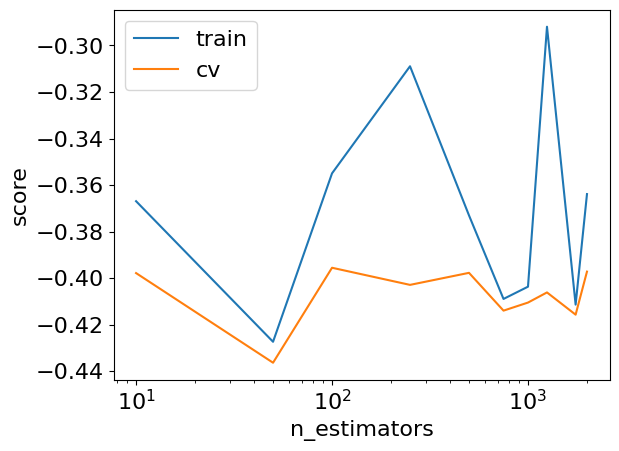

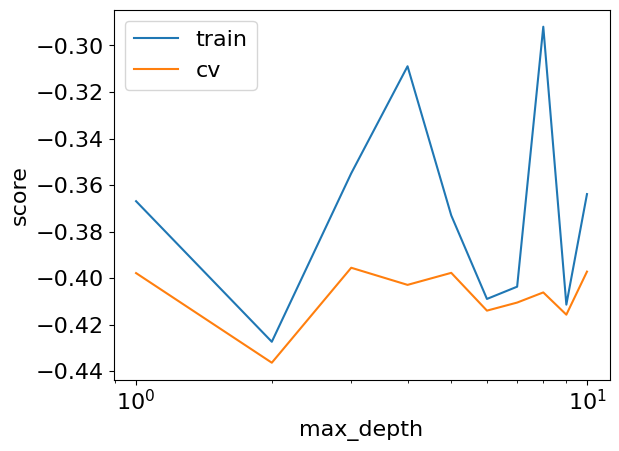

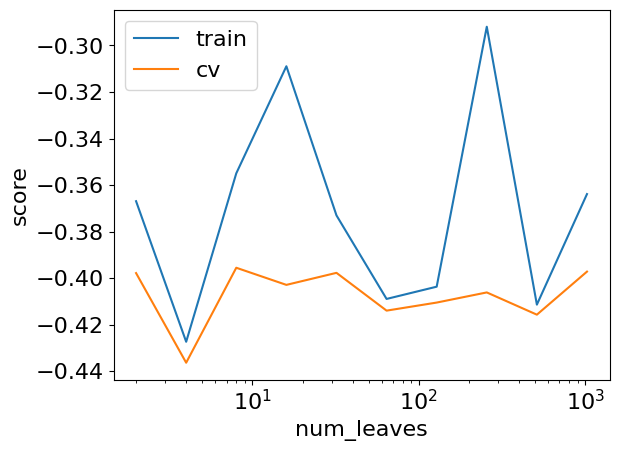

In [30]:
hyperparameters = ['n_estimators', 'max_depth', 'num_leaves']

# Create separate rows for each hyperparameter
for idx, x in enumerate(hyperparameters, start=1):
    hyp = "transformedtargetregressor__regressor__" + x
    
    plt.figure(idx)  # Create a new figure for each hyperparameter
    
    plt.semilogx(param_grid_lgbm[hyp], train_scores.tolist(), label="train")
    plt.semilogx(param_grid_lgbm[hyp], cv_scores.tolist(), label="cv")
    plt.legend()
    plt.xlabel(x)
    plt.ylabel("score")

# Show all the plots
plt.show()

In [31]:
best_vals_lgbm = search_lgbm.best_params_
best_num_leaves_lgbm = best_vals_lgbm['transformedtargetregressor__regressor__num_leaves']
best_n_estimators_lgbm = best_vals_lgbm['transformedtargetregressor__regressor__n_estimators']
best_max_depth_lgbm = best_vals_lgbm['transformedtargetregressor__regressor__max_depth']
print(best_vals_lgbm)

{'transformedtargetregressor__regressor__num_leaves': 8, 'transformedtargetregressor__regressor__n_estimators': 750, 'transformedtargetregressor__regressor__max_depth': 8}


In [32]:
final_results = {}
final_numerical_feats = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
final_categorical_feats = ['neighbourhood_group', 'room_type', "neighbourhood"]
final_drop_feats = ["id", "host_name","latitude", "longitude", "reviews_per_month", "number_of_reviews_ltm", "license"]

In [33]:
final_preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output = False, handle_unknown="ignore"), final_categorical_feats),
    (StandardScaler(), final_numerical_feats),
    ("drop", final_drop_feats)
)

In [34]:
final_ttr_LGBM = TransformedTargetRegressor(
    LGBMRegressor(num_leaves = best_num_leaves_lgbm,
                  n_estimators = best_n_estimators_lgbm,
                  max_depth = best_max_depth_lgbm,
                  random_state=123, 
                  verbose=-1), 
    func=np.log1p, inverse_func=np.expm1
)
final_pipe_lgbm = make_pipeline(
    final_preprocessor, final_ttr_LGBM
)


final_results["LGBM Regressor on Train/Cross Validation"] = mean_std_cross_val_scores(
    final_pipe_lgbm, X_train, y_train, return_train_score=True, scoring=mape_scorer
)
pd.DataFrame(final_results).T

/var/folders/vw/q9jxxbp12n58z440pzxjmhpc0000gp/T/ipykernel_43506/4158382658.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
LGBM Regressor on Train/Cross Validation,0.599 (+/- 0.166),0.158 (+/- 0.062),-0.396 (+/- 0.008),-0.355 (+/- 0.002)


In [35]:
final_pipe_lgbm.fit(X_train, y_train)
mape_test = mean_absolute_percentage_error(y_test, final_pipe_lgbm.predict(X_test))
print(f'MAPE : {mape_test}')

MAPE : 0.3901946497305129


In [38]:
with open("web_application/price_predictor.joblib", "wb") as f:
    joblib.dump(final_pipe_lgbm, f)

In [43]:
print(type(X_test.iloc[[0]]))
final_pipe_lgbm.predict(X_test.iloc[[0]])

<class 'pandas.core.frame.DataFrame'>


array([163.60924932])

In [44]:
print(type(final_pipe_lgbm))

<class 'sklearn.pipeline.Pipeline'>


In [49]:
df['neighbourhood'].unique()

array(['Clinton Hill', "Hell's Kitchen", 'Chelsea', 'Washington Heights',
       'Murray Hill', 'Williamsburg', 'Sunset Park', 'Astoria',
       'Financial District', 'Sunnyside', 'Midtown', 'East Elmhurst',
       'Upper West Side', 'West Village', 'Kensington', 'Bushwick',
       'Red Hook', 'Tribeca', 'Woodside', 'Roosevelt Island',
       'Concourse Village', 'Harlem', 'Flatbush', 'University Heights',
       'Flushing', 'Greenpoint', 'Ridgewood', 'Cypress Hills',
       "Prince's Bay", 'Port Richmond', 'East Village', 'Clason Point',
       'Bedford-Stuyvesant', 'Gravesend', 'Long Island City', 'Gramercy',
       'East Flatbush', 'East Harlem', 'St. George', 'Boerum Hill',
       'South Ozone Park', 'Park Slope', 'Crown Heights', 'Wakefield',
       'Forest Hills', 'Springfield Gardens', 'North Riverdale',
       'Belmont', 'Corona', 'Tremont', 'Elmhurst', 'Queens Village',
       'Prospect-Lefferts Gardens', 'Fort Greene', 'Allerton',
       'Upper East Side', 'Richmond Hill', 'K